In [8]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [9]:
ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')

In [10]:
ordinal.shape

(2580, 83)

In [11]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [12]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [13]:
X.shape

(2580, 79)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.25, random_state=5)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
CB = CatBoostRegressor(verbose=False)

In [16]:
CB.fit(X_train_scaled, Y_train)
CB_Score = CB.score(X_test_scaled, Y_test)

In [17]:
CB_Score

0.9442850725540561

In [18]:
predicted_value = CB.predict(X_test_scaled)

In [19]:
true_value = Y_test

In [20]:
mae = mean_absolute_error(Y_test, predicted_value)

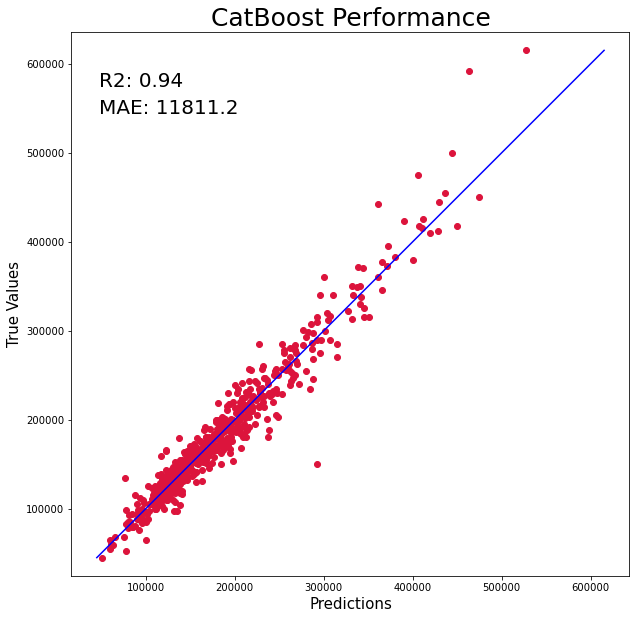

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(predicted_value, true_value, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

plt.title('CatBoost Performance', fontsize=25)
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.annotate('R2: ' + str(round(CB_Score,2)), xy=(0.05, 0.90), xycoords='axes fraction', fontsize=20)
plt.annotate('MAE: ' + str(round(mae,2)), xy=(0.05, 0.85), xycoords='axes fraction', fontsize=20)
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('True Values', fontsize=15)
plt.axis('equal')
plt.show()